In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

%matplotlib inline

In [2]:
class Simple_Linear_regression:
    
    #initialize input variables
    def __init__(self):
        self.learning_rate = 0.03
        self.epoch = 1000
        self.theta_0 = 0.4
        self.theta_1 = 0.7
        
        
    #load the csv file
    def import_data(self):
        self.train_data = pd.read_csv("train.csv")
        self.test_data = pd.read_csv("test.csv")
        #print(self.train_data)
        #print(self.test_data)
        
    #handle the missing data from train data
    def train_missing_data_handling(self):
        print("display datatype:\n",self.train_data.dtypes)  
        print("\n")
        print("check null value:\n", self.train_data.isnull().sum()) 
        self.train_data.replace(np.NaN, self.train_data.mean(), inplace = True) 
    
    #handle the missing data from test data
    def test_missing_data_handling(self):
        print("display datatype:\n",self.test_data.dtypes)
        print("\n")
        print("check null value:\n",self.test_data.isnull().sum()) 
        self.test_data.replace(np.NaN, self.test_data.mean(), inplace = True)
        
    #feature scalling on train data
    def feature_scalling(self):
        
        # Feature Scalling using Standardization 
        #self.train_data = pd.DataFrame(preprocessing.StandardScaler().fit(self.train_data).transform(self.train_data))
        
        # Feature Scalling using Normalization
        self.train_data = self.train_data - self.train_data.min()/self.train_data.max()-self.train_data.min() 
        #print("Standardization feature scaling\n",self.train_data)
        
        return self.train_data
   
    #Split the Dataset using numpy in Train,Test
    def split(self):
            x_array_train_data = np.array(self.train_data.x)
            y_array_train_data = np.array(self.train_data.y)
        
            x_array_test_data = np.array(self.test_data.x)
            y_array_test_data = np.array(self.test_data.y)
        
            return x_array_train_data,  y_array_train_data, x_array_test_data,y_array_test_data
    
    #Calculate Hypothesis Function
    #  H(x) = th0 + th1*Xi
    def hypothesis(self,x_array_train_data):
        hypothesis= self.theta_0 + self.theta_1*x_array_train_data
        return hypothesis
    
    # Calculate Gradient Decent 
    # th0 - (learning_rate * 1/ iterations )* sum_of_i_1_to_iterations[(th0+th1*Xi)-Yi]
    # th1 - (learning_rate * 1/ iterations )* sum_of_i_1_to_iterations[[(th0+th1*Xi)-Yi]*Xi]
    def Gradient_Decent(self):
        size = len(x_array_train_data)
        itration = self.epoch
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
        for itr in range(itration):
            #total_cost_fun=[0]*len(self.epoch)
            for row in range(len(x_array_train_data)):
                
                derivative_cost1 = self.hypothesis(x_array_train_data[row])- y_array_train_data[row]
                derivative_cost2 = (self.hypothesis(x_array_train_data[row])- y_array_train_data[row])*x_array_train_data[row]
                
                cost_fun = np.square((self.hypothesis(x_array_train_data[row]))-y_array_train_data[row])
            
            self.theta_0 = self.theta_0-(self.learning_rate* 1/size)*derivative_cost1
            #print("theta_0: ", self.theta_0)
            self.theta_1 = self.theta_1-(self.learning_rate* 1/size)*derivative_cost2
            #print("theta_1: ", self.theta_1)
            
            total_cost_fun= ((1/2)*size)*cost_fun
            #print("Cost ..",total_cost_fun)
            
            # ploting graphs  on each 50 epochs 
            if(itr%50 == 0):
                ax1.plot(itr,self.theta_0,color='r')
                ax1.set_title('iteration vs theta 0')
                ax2.plot(itr,self.theta_1,color='g')
                ax2.set_title('iteration vs theta 1')
                ax3.plot(itr, total_cost_fun,marker='*',color='b')
                ax3.set_title('iteration vs cost')
                ax4.plot(self.theta_0,self.theta_1,marker = 'x', color='black')
                ax4.set_title('theta_0 vs theta_1')
            if( total_cost_fun<=0.00009): 
                break
        plt.subplots_adjust(hspace=1)
        plt.show()    
            
        thetas=[self.theta_0 , self.theta_1]
        
        return thetas
    
        
#     def Cost_function(self):
#         for row in range(self.epoch):
#             for i in range(len(train_data_array_y)):
#                 temp4 = np.square((self.hypothesis(train_data_array_x[i]))-train_data_array_y[i])
#             temp3= ((1/2)*self.epoch)*temp4
#             print(temp3)
    
    # Find y_predict values
    def test_datas(self, x_array_test_data, thitas):
        y_predict = [0]* len(x_array_test_data)
        for i in range(len(x_array_test_data)):
            y_predict[i]=thitas[0]+(thitas[1]*x_array_test_data[i])
        return y_predict
     
        # find the Accuracy
    def Accuracy(self,y_predict,y_array_test_data):
        total_error = 0
        accuracy = 0
        for i in range(0,len(y_array_test_data)):
            total_error += abs((y_predict[i]-y_array_test_data[i])/y_array_test_data[i])
        total_error = (total_error/len(y_array_test_data))
        accuracy = (1-total_error)*100
        print("Accuracy:",accuracy)
        return accuracy
    

        

In [3]:
# Initialize values
obj = Simple_Linear_regression()


In [4]:
# Importing dataet
obj.import_data()

In [5]:
# Call for handling missing data of train
obj.train_missing_data_handling()

display datatype:
 x    float64
y    float64
dtype: object


check null value:
 x    0
y    1
dtype: int64


In [6]:
# Call for handling missing data of test
obj.test_missing_data_handling()

display datatype:
 x      int64
y    float64
dtype: object


check null value:
 x    0
y    0
dtype: int64


In [7]:
# done Feature Scaling 
data = obj.feature_scalling()
data.head(10)

,x,y
0,24.0,25.424704
1,50.0,51.339715
2,15.0,21.093908
3,38.0,40.461650
4,87.0,91.164236
5,36.0,36.339127
6,12.0,14.656149
7,81.0,84.638650
8,25.0,28.487403
9,5.0,10.838571


In [8]:
# call for Splitting Dataset
x_array_train_data,  y_array_train_data, x_array_test_data,y_array_test_data =  obj.split()

<Figure size 432x288 with 0 Axes>

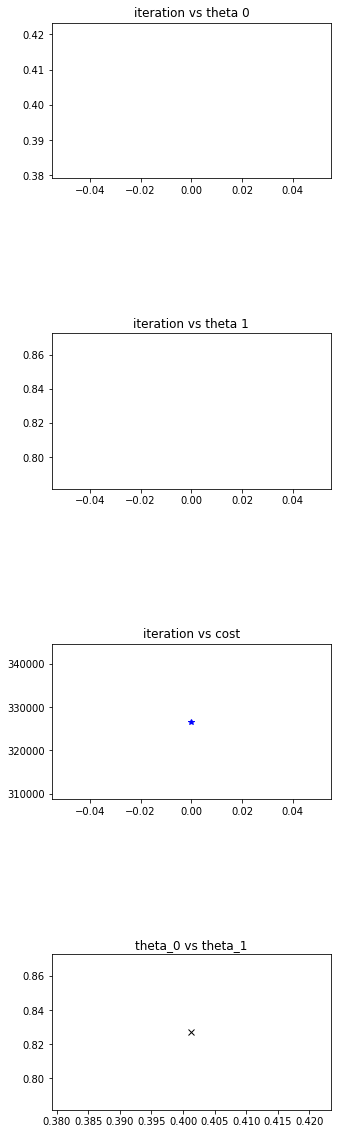

In [9]:
# Call Gradient_Decent Algorithm
Thitas = obj.Gradient_Decent()


In [10]:
# call for Y_predict values
y_predict = obj.test_datas(x_array_test_data, Thitas)
print(len(y_predict))

300


In [11]:
# calculate Accuracy
accuracy_print =obj.Accuracy(y_array_test_data,y_predict)

Accuracy: 81.86348964914426


In [12]:
print(accuracy_print)

81.86348964914426


In [13]:
#obj.Cost_function()